In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [2]:
def create_model():
    model = Sequential()
    #输入数据的shape为(n_samples, timestamps, features)
    #隐藏层设置为256, input_shape元组第二个参数1意指features为1
    #下面还有个lstm，故return_sequences设置为True
    model.add(LSTM(units=256,input_shape=(None,1),return_sequences=True))
    model.add(LSTM(units=256))
    #后接全连接层，直接输出单个值，故units为1
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    model.compile(loss='mse',optimizer='adam')
    return model

In [3]:
df = pd.read_csv('international-airline-passengers.csv',usecols=['passengers'])

# 数据归一化后分成序列

lstm处理数据之间一定要归一化，不然效果很差

In [5]:
scaler_minmax = MinMaxScaler()
data = scaler_minmax.fit_transform(df)
infer_seq_length = 10#用于推断的历史序列长度

d = []
for i in range(data.shape[0]-infer_seq_length):
    d.append(data[i:i+infer_seq_length+1].tolist())
d = np.array(d)

# 划分训练集

In [6]:
split_rate = 0.9
X_train, y_train = d[:int(d.shape[0]*split_rate),:-1], d[:int(d.shape[0]*split_rate),-1]

# 创建训练模型

In [7]:
model =create_model()

In [8]:
model.fit(X_train, y_train, batch_size=20,epochs=100,validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/100
108/108 [==============================] - 1s 13ms/step - loss: 0.0480 - val_loss: 0.0269
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0748
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0277
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0312
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0274
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0255
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0291
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0244
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0239
Epoch 10/100
108/108 [=======================

Epoch 81/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 82/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0066
Epoch 83/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0058
Epoch 84/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0097
Epoch 85/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 86/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0088
Epoch 87/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0061
Epoch 88/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 89/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0061
Epoch 90/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0025

# 预测结果

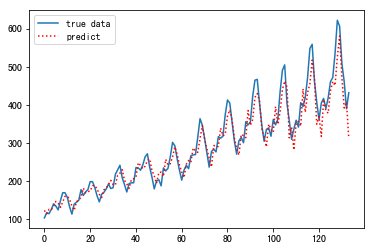

In [9]:
#inverse_transform获得归一化前的原始数据
plt.plot(scaler_minmax.inverse_transform(d[:,-1]),label='true data')
plt.plot(scaler_minmax.inverse_transform(model.predict(d[:,:-1])),'r:',label='predict')
plt.legend()

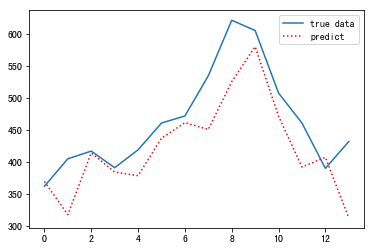

In [12]:
plt.plot()
plt.plot(scaler_minmax.inverse_transform(d[int(len(d)*split_rate):,-1]),label='true data')
plt.plot(scaler_minmax.inverse_transform(model.predict(d[int(len(d)*split_rate):,:-1])),'r:',label='predict')
plt.legend()